# Análisis de calidad en vinos

- El análisis de la calidad del vino es un área de interés tanto para productores como para consumidores, ya que permite identificar los factores que más influyen en la percepción de calidad y, por lo tanto, en el valor comercial del producto.  Este estudio se enfoca en el análisis de un dataset de vinos tintos con el objetivo de identificar las relaciones entre las propiedades fisicoquímicas del vino y su calidad, evaluada en una escala de 0 a 10 por expertos. El dataset incluye 1599 observaciones y 12 variables que describen características como la acidez fija y volátil, el contenido de alcohol, la cantidad de azúcar residual, entre otras.



- El análisis exploratorio inicial sugiere que algunas propiedades, como el pH, el contenido de alcohol y los niveles de dióxido de azufre, podrían estar correlacionadas con la calificación de calidad del vino. Este estudio buscará profundizar en estas relaciones utilizando técnicas de análisis estadístico y machine learning, con el objetivo de desarrollar un modelo predictivo que permita estimar la calidad del vino a partir de sus características fisicoquímicas.

# Preguntas de Investigación

- ¿Cuáles son las variables fisicoquímicas que más influyen en la calidad del vino según las calificaciones proporcionadas?
- ¿Existe una correlación significativa entre el contenido de alcohol y la calidad del vino?
- ¿Cómo afecta la combinación de diferentes niveles de acidez (fija y volátil) a la percepción de calidad del vino?
- Qué rol juegan los niveles de dióxido de azufre (libre y total) en la calidad del vino?
- ¿Es posible predecir la calidad del vino utilizando un modelo de machine learning basado en las variables disponibles?

# Hipótesis

- Hipótesis 1: Existe una correlación positiva significativa entre el contenido de alcohol y la calidad del vino.
- Hipótesis 2: Las variables de acidez fija y volátil combinadas tienen un efecto significativo en la calificación de calidad del vino.
- Hipótesis 3: Un mayor nivel de dióxido de azufre total está asociado con una menor calificación de calidad del vino.
- Hipótesis 4: Un modelo de regresión lineal o un algoritmo de machine learning de clasificación puede predecir con precisión la calidad del vino a partir de las propiedades fisicoquímicas medidas.

- # Contexto Comercial
La industria vinícola es altamente competitiva, donde la percepción de calidad es un factor clave para el éxito comercial. Una mejor comprensión de los factores que influyen en la calidad del vino permitirá a los productores tomar decisiones basadas en datos, optimizar procesos de producción y mejorar su posicionamiento en el mercado. El objetivo del análisis es identificar oportunidades de mejora en los vinos producidos y optimizar los recursos para maximizar la rentabilidad.

- # Problema Comercial
La calidad del vino es subjetiva, y aunque se puede medir con evaluaciones sensoriales, hay una necesidad de basar esta calidad en características químicas que sean más objetivas. El problema radica en entender cómo estas variables químicas influyen en la calidad percibida del vino y cómo optimizarlas para producir vinos consistentemente de alta calidad.

# Dependencias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
from matplotlib.ticker import FormatStrFormatter
from mlxtend.plotting import plot_decision_regions
from seaborn import boxplot

pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Data Acquisition

In [2]:
file_path = 'https://raw.githubusercontent.com/RussoT99/ProyectoDS_ParteI/main/winequality-red.csv'

df = pd.read_csv(file_path)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Descripción de las variables

**Datos**

*  **fixed acidity:** La cantidad de ácidos no volátiles en el vino. Se mide en gramos por litro (g/L).

*  **volatile acidity:** Se refiere a la cantidad de ácidos volátiles en el vino. Un nivel alto puede indicar problemas en la fermentación. Se mide en gramos por litro (g/L).

*  **citric acid:**  Representa la cantidad de ácido cítrico. Se mide en gramos por litro (g/L).

*  **residual sugar:** Es la cantidad de azúcar que queda en el vino después de la fermentación. Se mide en gramos por litro (g/L).

*  **chlorides:** La cantidad de cloruro en el vino. Se mide en gramos por litro (g/L).

*  **free sulfur dioxide:** El dióxido de azufre libre, que actúa como conservante. Se mide en miligramos por litro (mg/L).

*  **total sulfur dioxide:** La suma de todo el dióxido de azufre presente en el vino, tanto en forma libre como combinada. Se mide en miligramos por litro (mg/L).

*  **density:** La densidad del vino, que puede estar influenciada por el contenido de alcohol y azúcar. Se expresa en g/cm³.

*  **pH:** Mide la acidez o alcalinidad del vino en una escala de 0 a 14. Siendo 0 muy acido y 14 muy básico o alcalino.

*  **sulphates:**  La cantidad de sulfatos en el vino. Se mide en gramos por litro (g/L).

*  **alcohol:** El porcentaje de alcohol en el vino. Es la graduación alcoholica de la bebida.

*  **quality:**  La calificación de calidad del vino, usualmente en una escala de 0 a 10, basada en evaluaciones sensoriales.





# Estadística Descriptiva

In [4]:
df.shape

(1599, 12)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.3,0.5,0.3,2.5,0.1,15.9,46.5,1.0,3.3,0.7,10.4,5.6
std,1.7,0.2,0.2,1.4,0.0,10.5,32.9,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,22.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.3,2.2,0.1,14.0,38.0,1.0,3.3,0.6,10.2,6.0
75%,9.2,0.6,0.4,2.6,0.1,21.0,62.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,72.0,289.0,1.0,4.0,2.0,14.9,8.0


In [9]:
cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique())/(df.shape[0])*(100)})
cardinalidad

,Cantidad,Porcentaje
fixed acidity,96,6.003752
volatile acidity,143,8.943089
citric acid,80,5.003127
residual sugar,91,5.691057
chlorides,153,9.568480
free sulfur dioxide,60,3.752345
total sulfur dioxide,144,9.005629
density,436,27.267042
pH,89,5.565979
sulphates,96,6.003752


In [10]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

# Visualizaciones y Gráficos

# ACIDEZ

<Axes: xlabel='quality', ylabel='fixed acidity'>

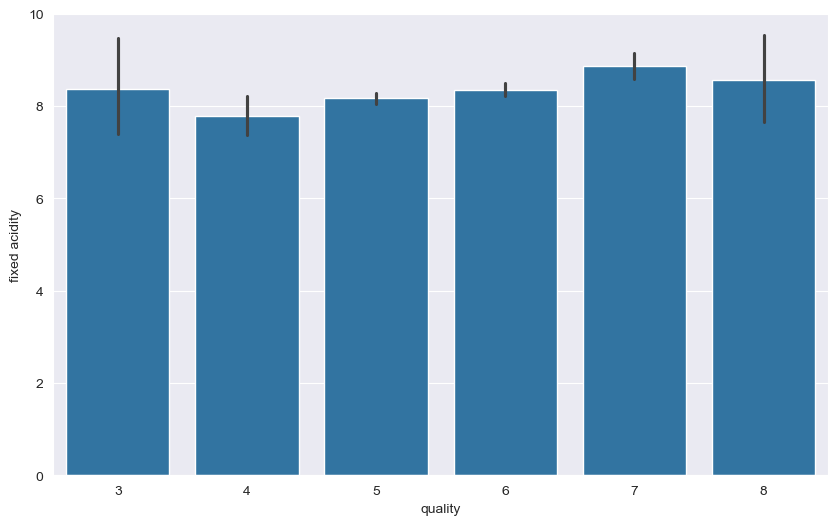

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

Aquí se puede observar que la acidez no da ninguna especificación para clasificar la calidad.

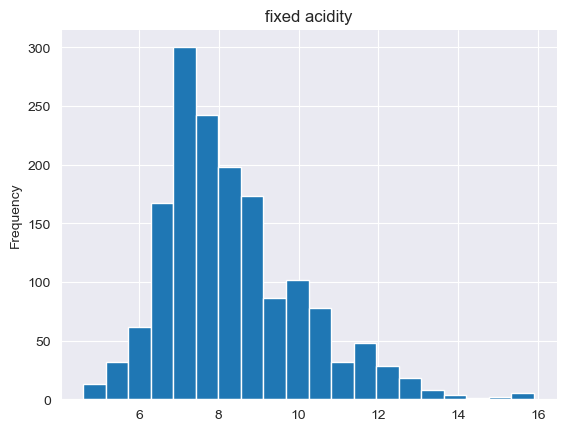

In [12]:
df['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

En este gráfico se puede ver que la acidez pareciera tener una distribución normal y que la mayoria de los valores ronda entre 6 y 10 g/L

<Axes: xlabel='quality', ylabel='volatile acidity'>

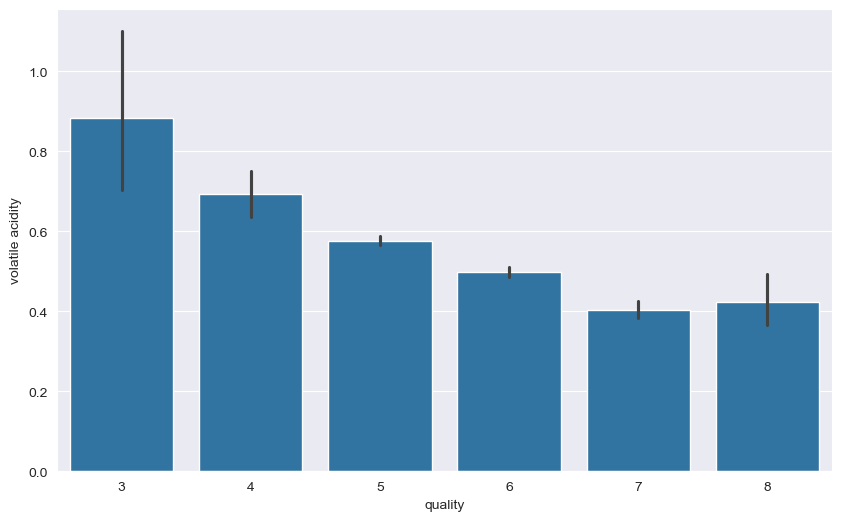

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

Aquí se puede ver que es una tendencia bastante a la baja en la acidez volátil a medida que subimos la calidad

<Axes: xlabel='quality', ylabel='citric acid'>

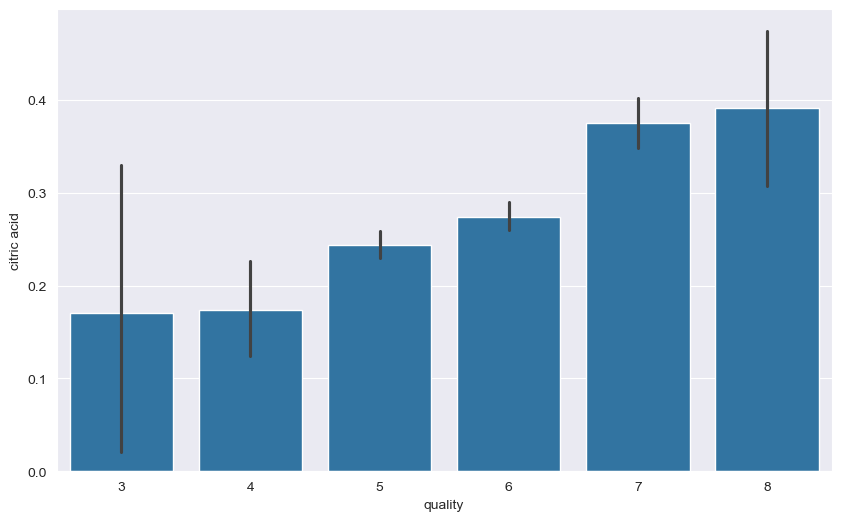

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

La composición del ácido cítrico aumenta a medida que aumenta la calidad del vino

# AZUCAR RESIDUAL

<Axes: xlabel='quality', ylabel='residual sugar'>

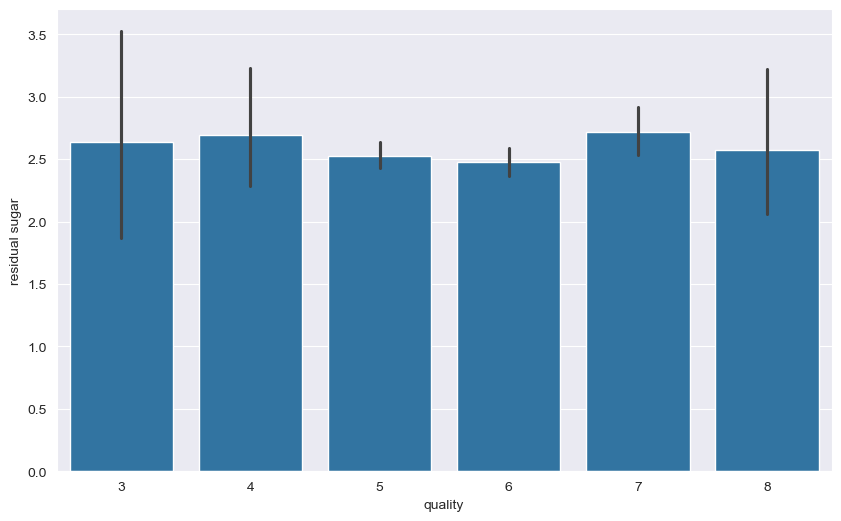

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

La cantidad de azúcar residual no varia ni influye en la calidad del vino

# CLORUROS

<Axes: xlabel='quality', ylabel='chlorides'>

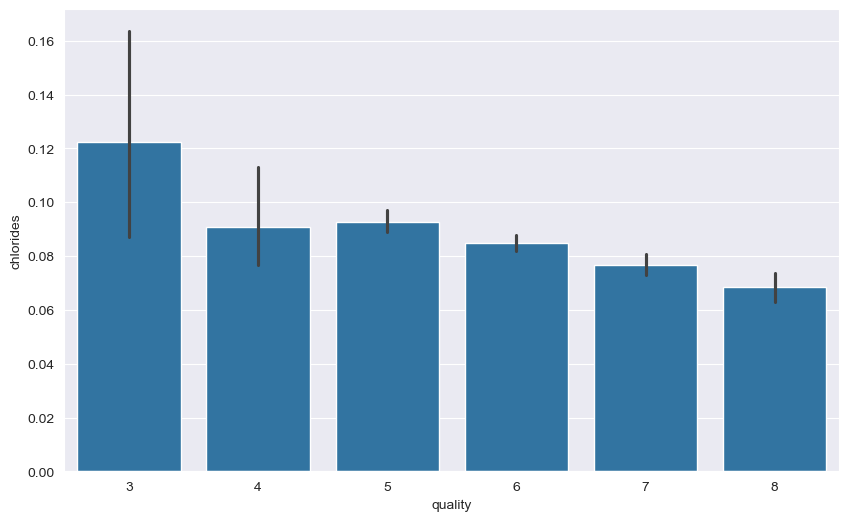

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

La cantidad de cloruro es menor a medida que aumenta la calidad del vino

# SULFATOS

<Axes: xlabel='quality', ylabel='sulphates'>

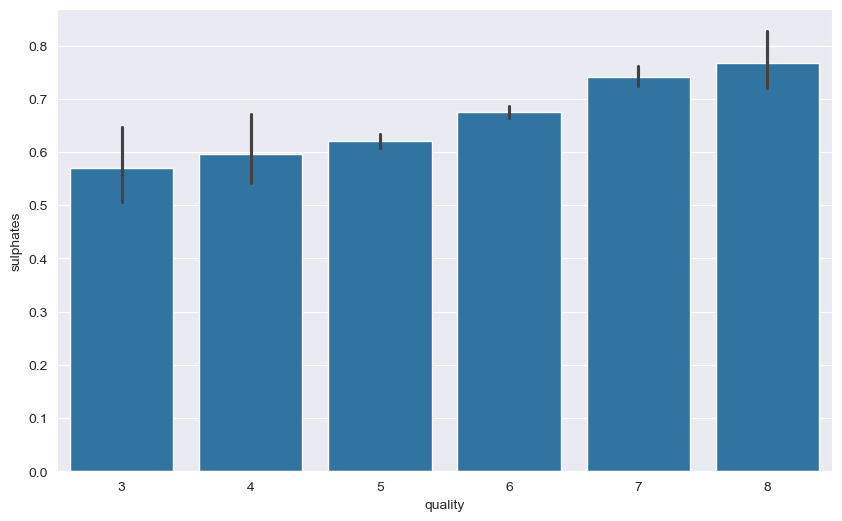

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

La cantidad de sulfatos aumenta a medida que aumenta la calidad del vino

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

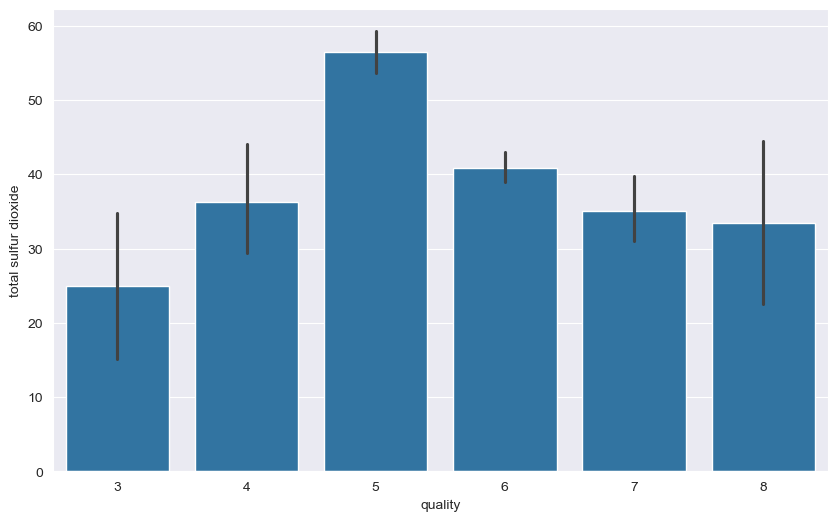

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)


In [19]:
correlation_sulfur_quality = df['total sulfur dioxide'].corr(df['quality'])
print(f"Correlación entre dióxido de azufre total y calidad: {correlation_sulfur_quality:.2f}")

Correlación entre dióxido de azufre total y calidad: -0.19


La correlación negativa débil (-0.19) sugiere que casi no existe tendencia a que vinos con mayor contenido de dióxido de azufre total tengan una calidad ligeramente menor.



# ALCOHOL

<Axes: xlabel='quality', ylabel='alcohol'>

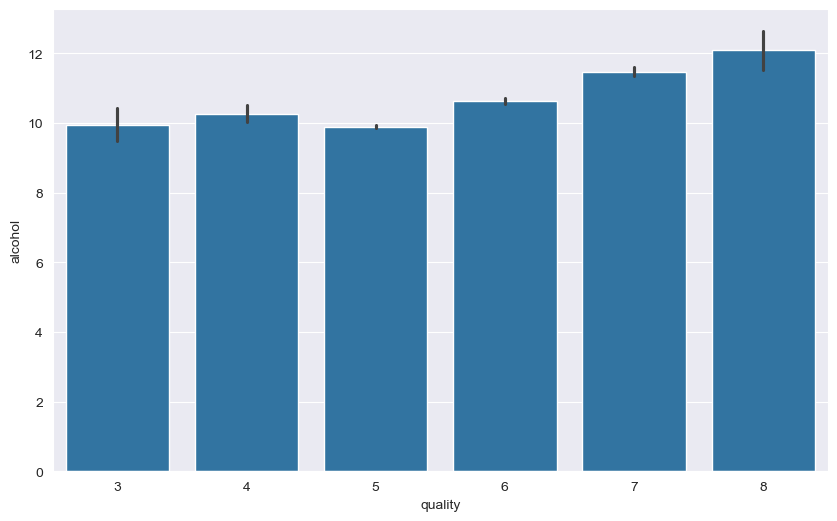

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

El porcentaje de alcohol aumenta a medida que aumenta la calidad del vino

In [21]:
correlation_alcohol_quality = df['alcohol'].corr(df['quality'])
print(f"Correlación entre alcohol y calidad: {correlation_alcohol_quality:.2f}")

Correlación entre alcohol y calidad: 0.48


La correlación positiva moderada (0.48) y el gráfico  sugieren que a medida que aumenta el contenido de alcohol, tiende a aumentar la calidad percibida del vino.

# CALIDAD

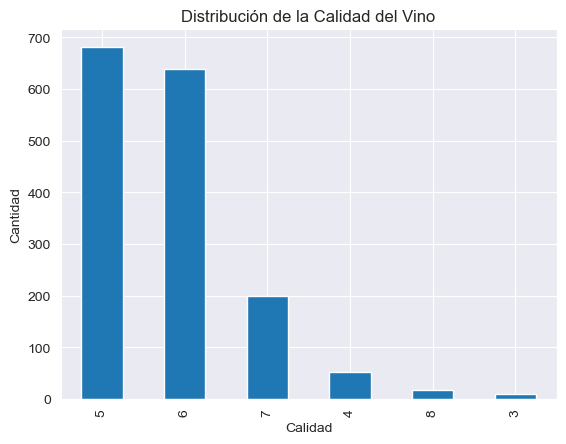

In [22]:
# Análisis de la variable objetivo (calidad)
df['quality'].value_counts().plot(kind='bar')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.title('Distribución de la Calidad del Vino')
plt.show()

# HISTOGRAMAS Y BOXPLOTS

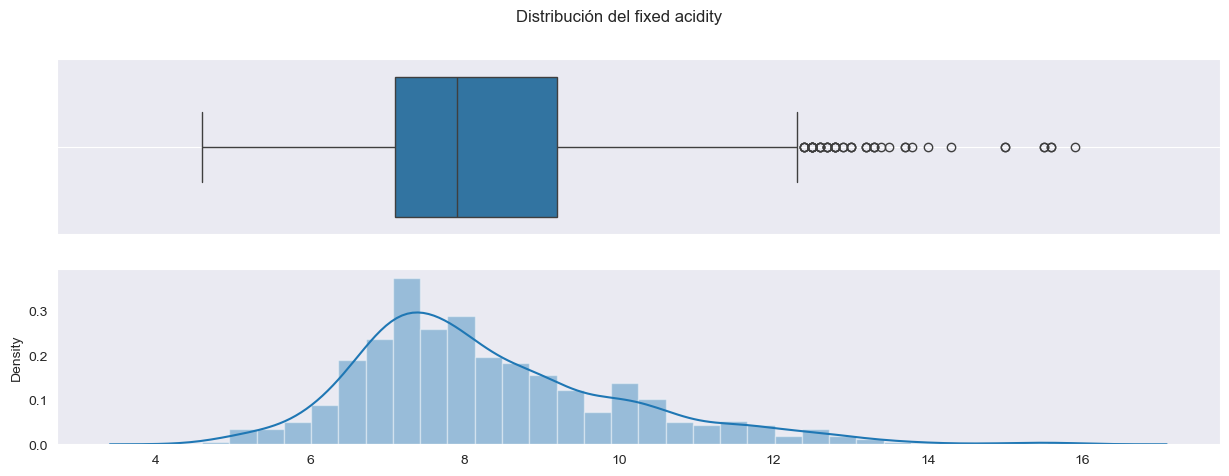

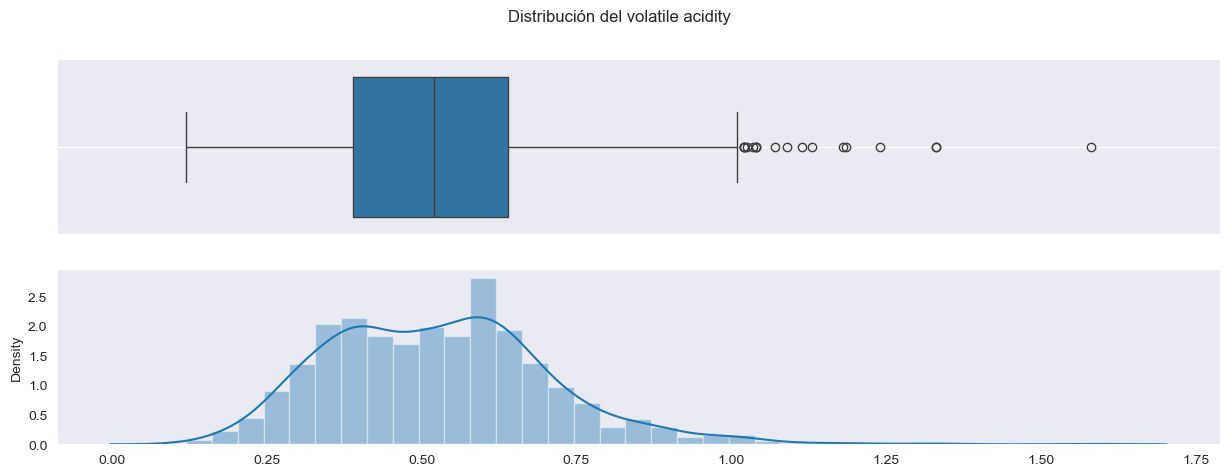

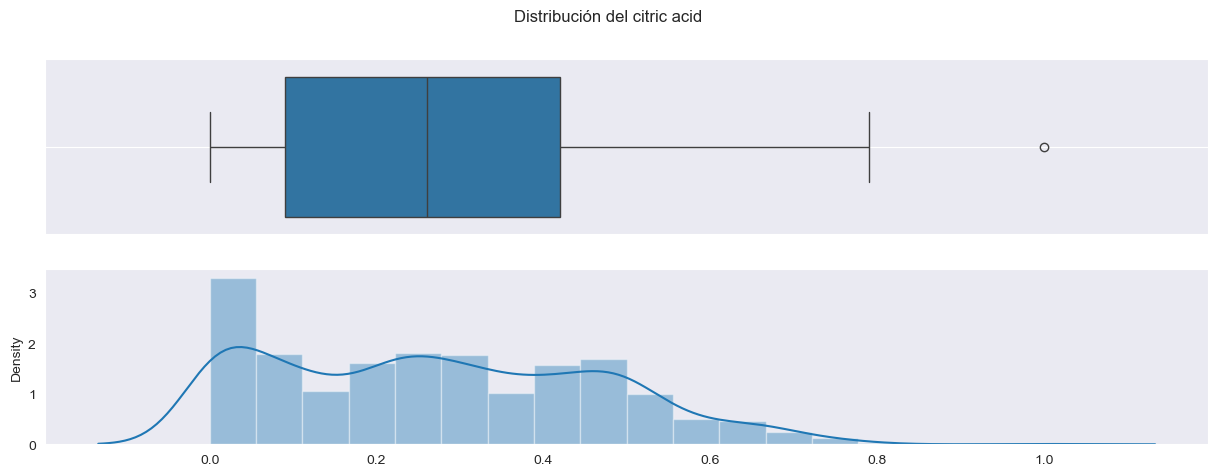

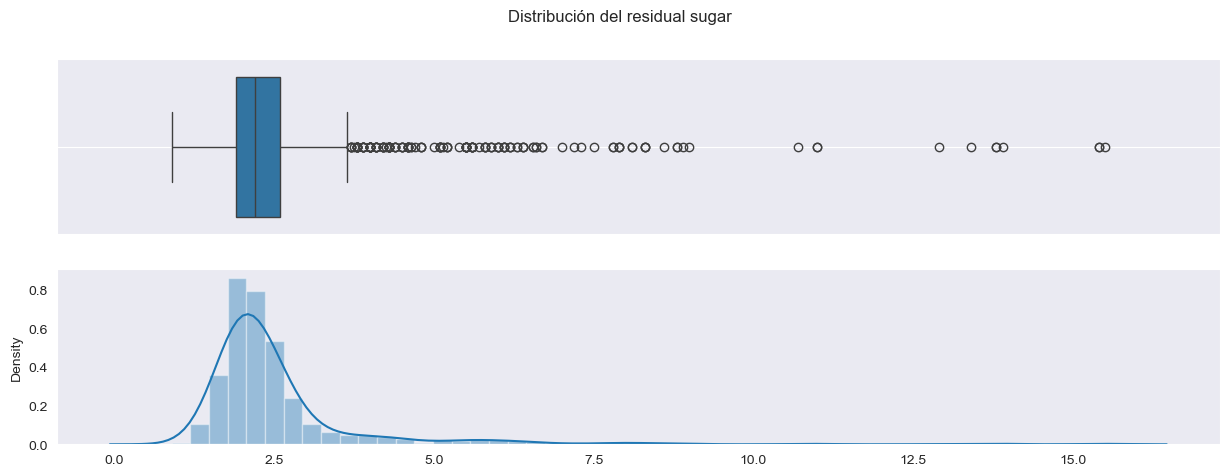

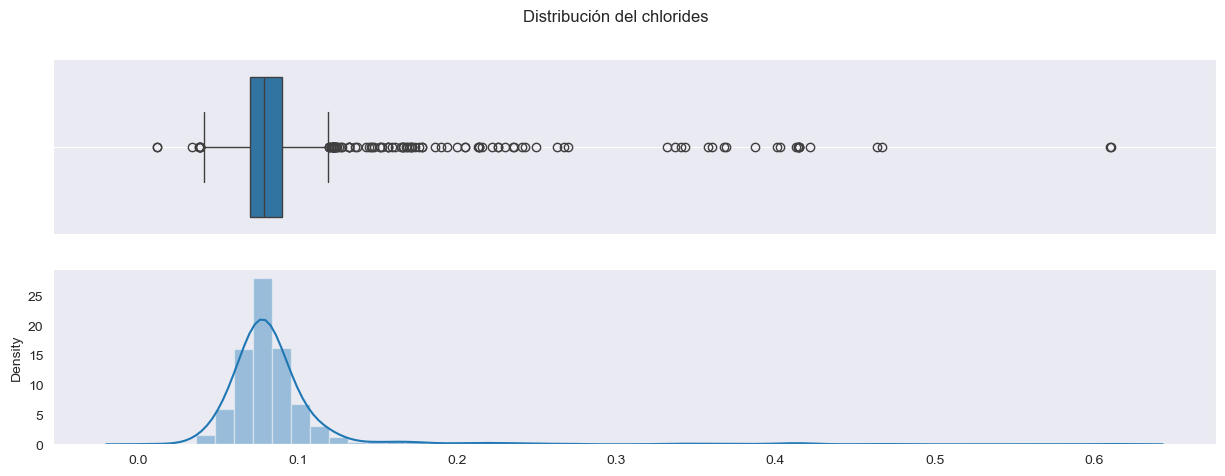

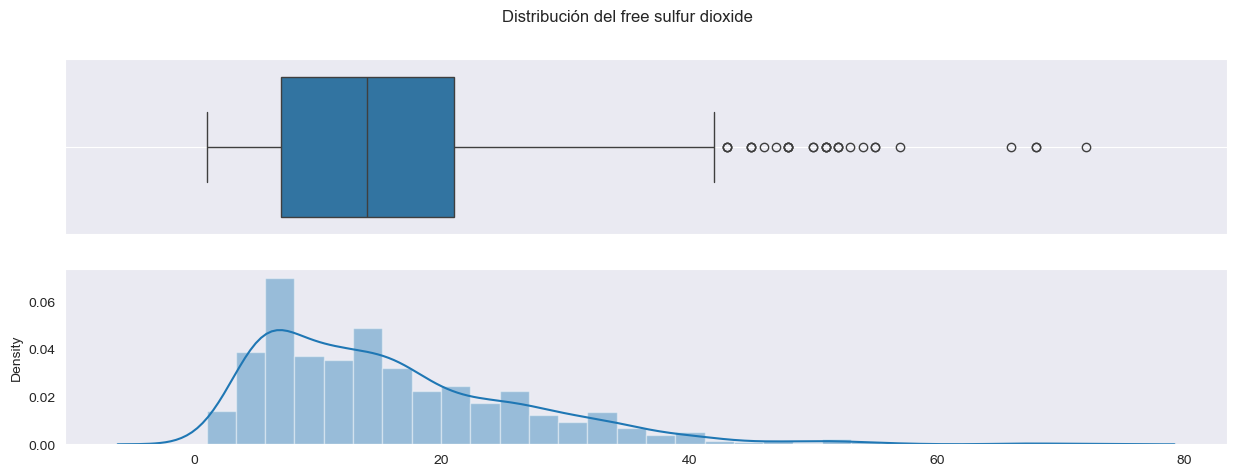

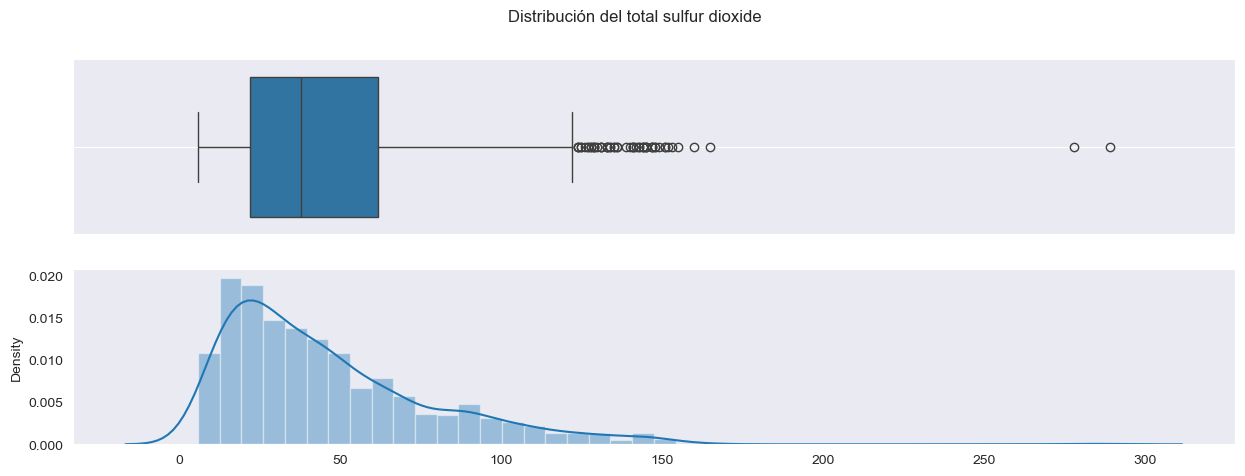

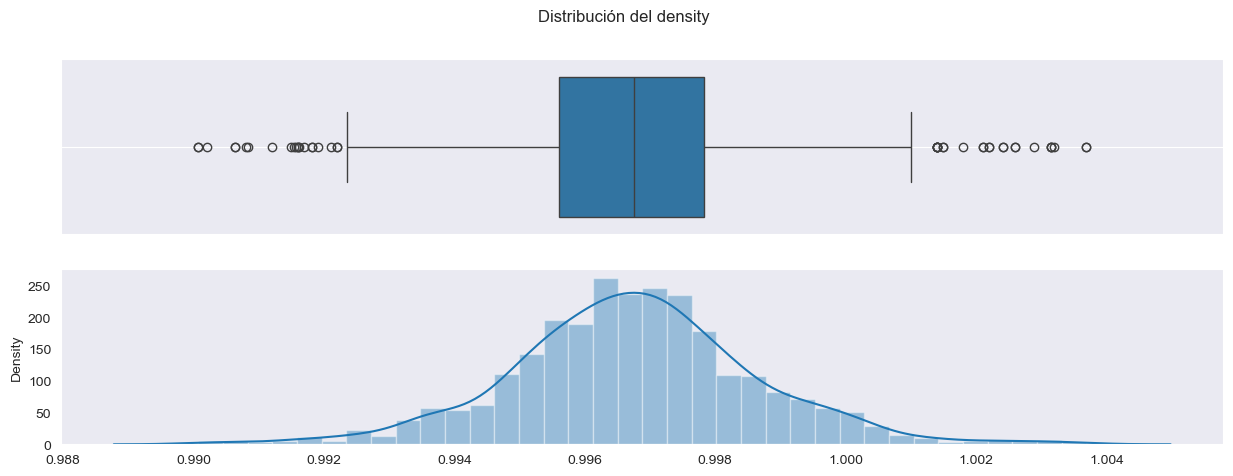

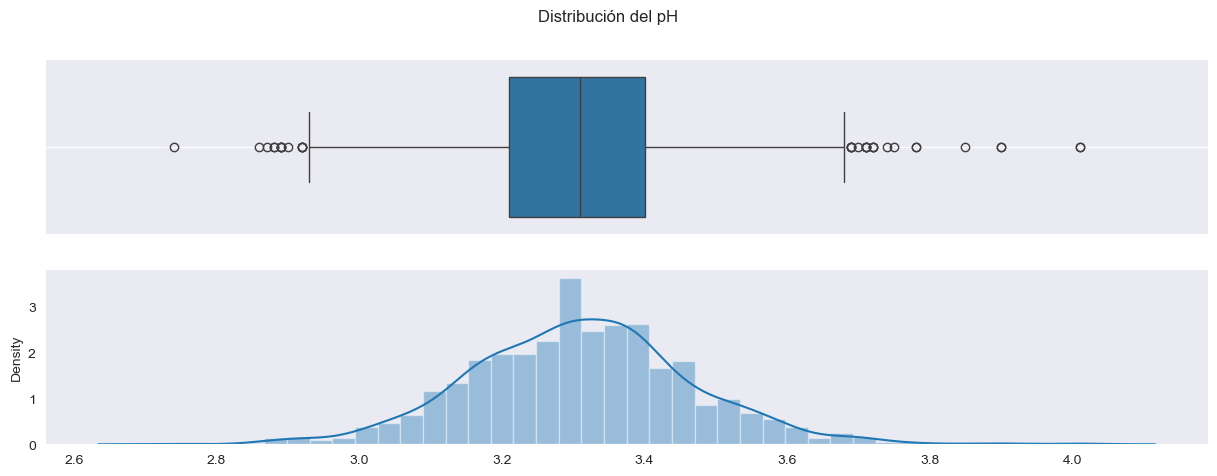

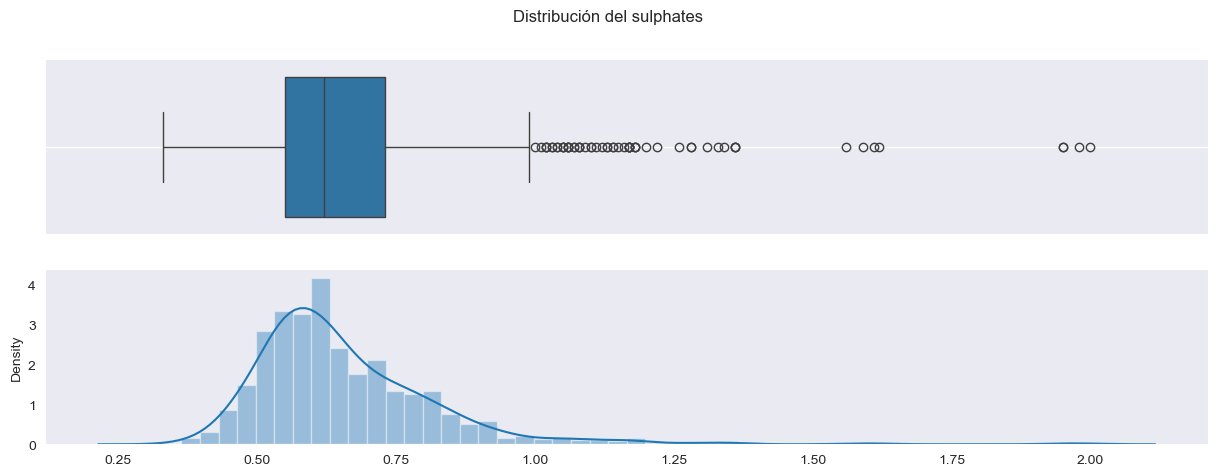

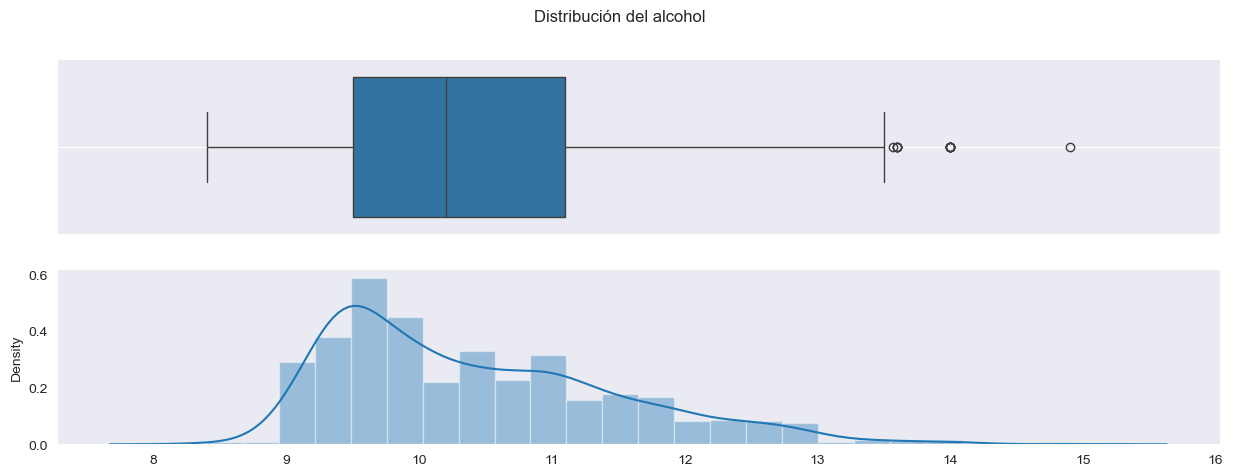

In [23]:
numeric_var = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']

for _, feature in enumerate(numeric_var):
      fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
      fig.suptitle(f'Distribución del {feature}')
      sns.boxplot(x = df[feature], ax = axes[0])
      sns.distplot(x = df[feature], ax = axes[1])
      axes[0].grid()
      axes[1].grid()
      plt.show()


# OUTLIERS

In [24]:
# Analisis de Outliers: Variable objetivo pH

# Calculamos el z-score
df['pH_z'] = (df['pH'] - df['pH'].mean())/df['pH'].std()
# Creamos una variable para marcar los outliers
df['pH_outliers'] = 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
df.loc[(df['pH_z']>3)|(df['pH_z']<-3) , 'pH_outliers'] = 1
# Veamos los resultados
df[['pH', 'pH_z','pH_outliers']]

,pH,pH_z,pH_outliers
0,3.51,1.288240,0
1,3.20,-0.719708,0
2,3.26,-0.331073,0
3,3.16,-0.978798,0
4,3.51,1.288240,0
...,...,...,...
1594,3.45,0.899605,0
1595,3.52,1.353012,0
1596,3.42,0.705287,0
1597,3.57,1.676875,0


In [25]:
# Veamos los casos marcados
df['pH_outliers'].value_counts()

pH_outliers
0    1591
1       8
Name: count, dtype: int64

In [26]:
# Se traen los valores puntuales donde se consideraron los outliers.
df['pH'][df['pH_outliers']==1]

45      3.90
95      3.85
151     2.74
695     3.90
1111    3.78
1300    3.78
1316    4.01
1321    4.01
Name: pH, dtype: float64

# Matriz de correlación

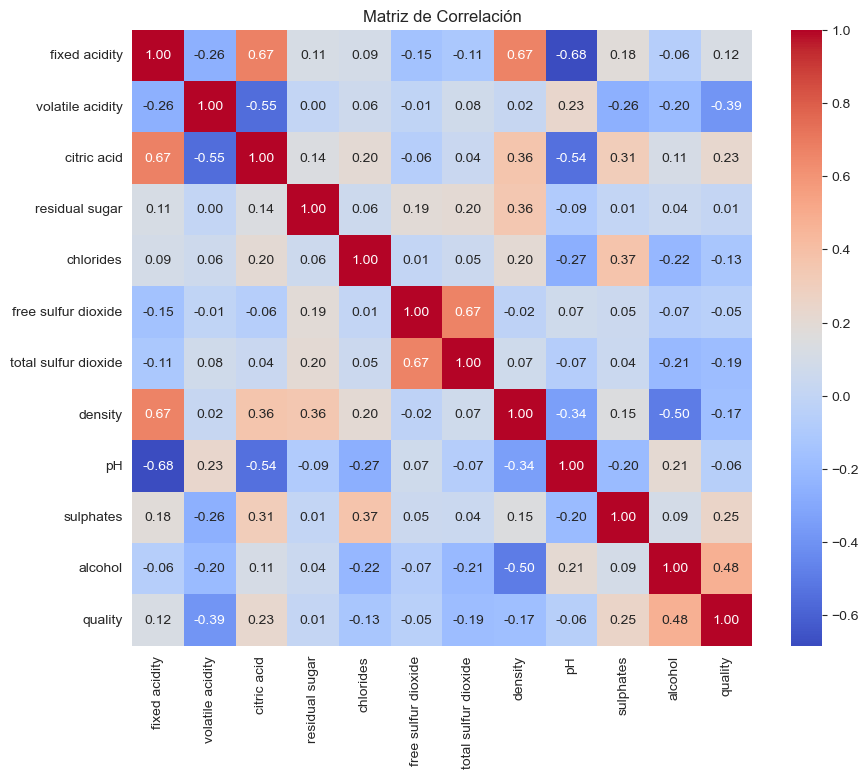

In [27]:
# Seleccionamos las variables que queremos incluir en la matriz
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol', 'quality']

# Creamos un subconjunto del DataFrame con las variables seleccionadas
df_subset = df[variables]

# Calculamos la matriz de correlación
correlation_matrix = df_subset.corr()

# Visualizamos la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Exploratory Data Analysis (EDA)
El análisis exploratorio de los datos permitió identificar la distribución de las principales variables químicas y su correlación con la calidad del vino. Se observaron patrones en las variables de acidez volátil y contenido de alcohol, que mostraron correlaciones positivas y negativas con la calidad. Además, se encontraron algunos datos atípicos en la columna de pH, que fueron tratados para evitar influencias indebidas en el modelo.

# Conclusiones del EDA:

- Las variables más correlacionadas con la calidad del vino son alcohol y volatile acidity.
- Se identificaron ciertos valores atípicos en las columnas de pH y density.
- Las categorías de calidad muestran una distribución no uniforme, con más vinos en las categorías medias (calidad "regular").

# Recomendaciones con base en insights observados

Durante el análisis de los datos de calidad del vino, se observaron ciertos patrones significativos. A partir de estos insights, se pueden hacer las siguientes recomendaciones:

- Optimización de la acidez volátil: Los vinos con menor acidez volátil parecen tener una mejor calidad percibida. Se sugiere un control más estricto de este parámetro en el proceso de elaboración.

- Control de azúcares residuales: Aunque el azúcar residual puede influir en el sabor, se recomienda mantener niveles moderados para evitar vinos con puntuaciones de calidad más bajas.

- Ajuste del contenido de dióxido de azufre: Se observó una relación entre los niveles de dióxido de azufre y la calidad. Un balance adecuado entre el dióxido de azufre libre y total podría mejorar la percepción de calidad en los vinos.

# APRENDIZAJE SUPERVISADO

- # Objetivo
El principal objetivo de este análisis es desarrollar un modelo de clasificación supervisado para predecir la calidad del vino, categorizándolo como "malo", "regular" o "bueno", en base a un conjunto de características químicas. El enfoque final es proporcionar insights accionables para optimizar el proceso de producción y mejorar la calidad del producto final.

In [28]:
# Creo una nueva columna 'calidad_categoria'
bins = (0, 4, 6, 10)
group_names = ['malo', 'regular', 'bueno']
df['calidad_categoria'] = pd.cut(df['quality'], bins = bins, labels = group_names)


En una primera instancia, se dispuso a agrupar la puntuación de calidad de vino en 3 variables catégoricas ordinales: "bueno","malo" y "regular". Para asi luego, encodear esas variables categóricas a números enteros mediante un etiquetado.

Está nueva variable de categorias de calidad será nuestro target.

In [29]:
df.calidad_categoria.unique()


['regular', 'bueno', 'malo']
Categories (3, object): ['malo' < 'regular' < 'bueno']

In [30]:
df['calidad_categoria'].value_counts()

calidad_categoria
regular    1319
bueno       217
malo         63
Name: count, dtype: int64

In [31]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH_z,pH_outliers,calidad_categoria
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.288240,0,regular
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,-0.719708,0,regular
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,-0.331073,0,regular
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,-0.978798,0,regular
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.288240,0,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.899605,0,regular
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.353012,0,regular
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.705287,0,regular
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.676875,0,regular


In [32]:
df['calidad_categoria'].dtype


CategoricalDtype(categories=['malo', 'regular', 'bueno'], ordered=True, categories_dtype=object)

In [33]:
df['calidad_categoria'] = df['calidad_categoria'].astype('category')


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  pH_z                  1599 non-null   float64 
 13  pH_outliers           1599 non-null   int64   
 14  calidad_categoria     1599 non-null   category
dtypes: c

In [35]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
df['calidad_codificada'] = label_quality.fit_transform(df['calidad_categoria'])
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH_z,pH_outliers,calidad_categoria,calidad_codificada
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.288240,0,regular,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.719708,0,regular,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.331073,0,regular,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,-0.978798,0,regular,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.288240,0,regular,2


In [36]:
df.describe(include = 'category').T

,count,unique,top,freq
calidad_categoria,1599,3,regular,1319


In [37]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'density', 'pH', 'sulphates', 'alcohol']

X = df[features]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [38]:
y = df['calidad_codificada']
y = df['calidad_codificada'].values.astype(int)
y

array([2, 2, 2, ..., 2, 2, 2])

In [39]:
y = pd.Series(df['calidad_codificada'])
y.value_counts()

calidad_codificada
2    1319
0     217
1      63
Name: count, dtype: int64

In [40]:
df_calidad = df[['calidad_categoria','calidad_codificada']]
df_calidad.value_counts()

calidad_categoria  calidad_codificada
regular            2                     1319
bueno              0                      217
malo               1                       63
Name: count, dtype: int64

# MODELO DE CLASIFICACIÓN: RANDOM FOREST 

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [42]:
# Balanceo de clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Creación del modelo RF con parámetros ajustados
rf_clf = RandomForestClassifier(n_estimators=100, 
                                       max_depth=10, 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       max_features='sqrt', 
                                       bootstrap=True, 
                                       random_state=42)

# Entrenamiento del modelo
rf_clf.fit(X_train, y_train)

# Predección en el conjunto de prueba 
y_pred_test = rf_clf.predict(X_test)

# Predección en el conjunto de entrenamiento
y_pred_train = rf_clf.predict(X_train)

El balanceo de las clases se realiza debido a que en la categoría regular tengo muchos mas vinos que en las otras dos categorias, por lo que es necesario realizar un ajuste para mejorar asi el modelo 

In [43]:
# Exactitud del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Exactitud del modelo en el conjunto de prueba: {accuracy:.2f}")

# Reporte de clasificación para el conjunto de prueba
print(classification_report(y_test, y_pred_test, target_names=['malo', 'regular', 'bueno']))

# Exactitud del modelo en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Exactitud del modelo en el conjunto de entrenamiento: {accuracy_train:.2f}")

# Reporte de clasificación para el conjunto de entrenamiento
print(classification_report(y_train, y_pred_train, target_names=['malo', 'regular', 'bueno']))


Exactitud del modelo en el conjunto de prueba: 0.91
              precision    recall  f1-score   support

        malo       0.87      0.98      0.92       262
     regular       0.90      0.98      0.94       241
       bueno       0.96      0.79      0.87       289

    accuracy                           0.91       792
   macro avg       0.91      0.92      0.91       792
weighted avg       0.91      0.91      0.91       792

Exactitud del modelo en el conjunto de entrenamiento: 0.98
              precision    recall  f1-score   support

        malo       0.96      0.99      0.98      1057
     regular       0.98      1.00      0.99      1078
       bueno       0.99      0.94      0.96      1030

    accuracy                           0.98      3165
   macro avg       0.98      0.97      0.97      3165
weighted avg       0.98      0.98      0.98      3165



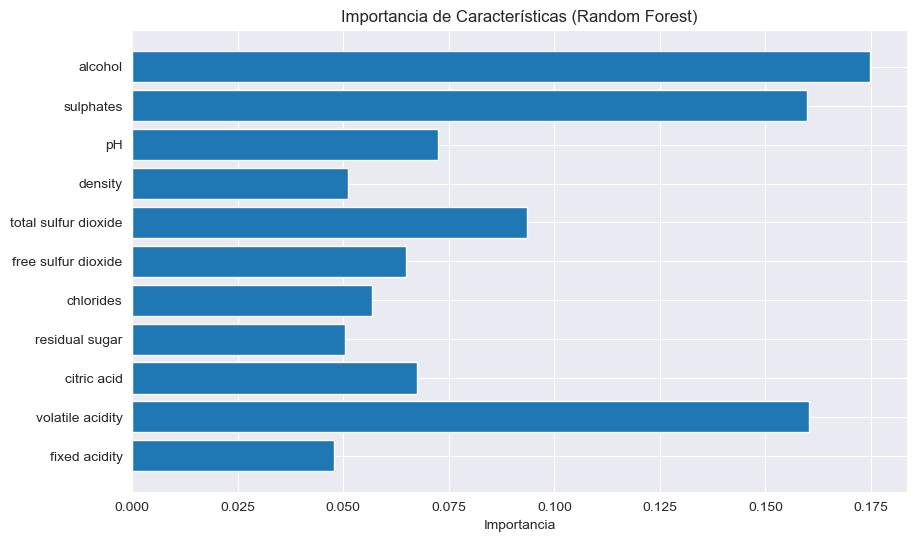

In [44]:
# Importancia de características
importances = rf_clf.feature_importances_
feature_names = X.columns

# Crear un gráfico de barras de importancia de características
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Importancia')
plt.title('Importancia de Características (Random Forest)')
plt.show()

# Conclusiones del Modelo Random Forest

-
-
-



# PCA

In [45]:
df_2 = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']]

In [46]:
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components=4)

modelo_pca.fit(df_2)

modelo_pca.explained_variance_ratio_[0]


0.946576976395463

In [47]:
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4']
componentes = pd.DataFrame(data=modelo_pca.components_, columns = df_2.columns, index=lista_componentes)
componentes

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,-0.006132,0.000384,0.000171,0.008649,0.000064,0.218857,0.975678,0.000004,-0.000268,0.000223,-0.006358
PC2,-0.023899,-0.002010,-0.003035,0.011135,-0.000237,0.975266,-0.218917,-0.000025,0.003272,0.000619,0.014564
PC3,0.953136,-0.025132,0.073708,0.280914,0.002946,0.020897,-0.001527,0.000776,-0.058631,0.017525,-0.048599
PC4,-0.265092,0.007274,-0.009832,0.943178,-0.000645,-0.021189,-0.003980,0.000055,0.020578,-0.007199,0.197614


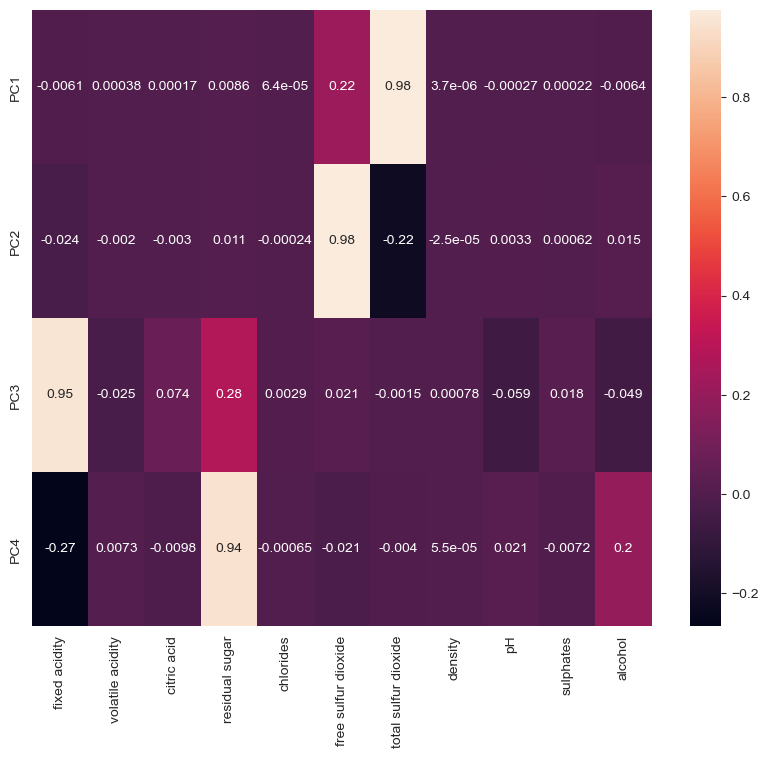

In [48]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(componentes, annot=True)

In [49]:
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(2)*100)

['PC1', 'PC2', 'PC3', 'PC4']
[95.  5.  0.  0.]


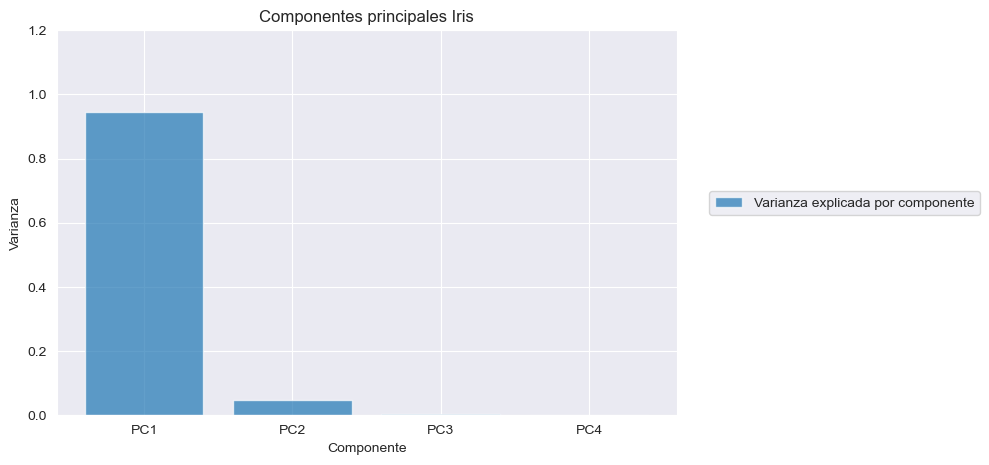

In [50]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(lista_componentes, modelo_pca.explained_variance_ratio_, alpha=0.7, label='Varianza explicada por componente')


ax.set_title('Componentes principales Iris')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 1.2)
ax.legend(bbox_to_anchor = (1.5, 0.6))

In [51]:
proyecciones = pd.DataFrame(modelo_pca.transform(df_2), index=df_2.index,columns=lista_componentes)
proyecciones

,PC1,PC2,PC3,PC4
0,-13.224905,-2.023900,-1.126821,-0.399233
1,22.037724,4.408322,-0.310378,-0.199938
2,7.162673,-2.501461,-0.581868,-0.219069
3,13.430063,-1.951122,2.634040,-1.574059
4,-13.224905,-2.023900,-1.126821,-0.399233
...,...,...,...,...
1594,1.129111,16.313102,-1.860069,-0.257109
1595,9.489984,21.627525,-1.986558,-0.027199
1596,-3.431354,14.271243,-1.750719,0.174652
1597,1.132878,16.316167,-2.134414,-0.235388


In [52]:
proyecciones.drop(columns=['PC3', 'PC4'], inplace=True)
proyecciones

,PC1,PC2
0,-13.224905,-2.023900
1,22.037724,4.408322
2,7.162673,-2.501461
3,13.430063,-1.951122
4,-13.224905,-2.023900
...,...,...
1594,1.129111,16.313102
1595,9.489984,21.627525
1596,-3.431354,14.271243
1597,1.132878,16.316167


In [53]:
proyecciones['calidad_codificada'] = df['calidad_codificada']
proyecciones

,PC1,PC2,calidad_codificada
0,-13.224905,-2.023900,2
1,22.037724,4.408322,2
2,7.162673,-2.501461,2
3,13.430063,-1.951122,2
4,-13.224905,-2.023900,2
...,...,...,...
1594,1.129111,16.313102,2
1595,9.489984,21.627525,2
1596,-3.431354,14.271243,2
1597,1.132878,16.316167,2


In [54]:
proyecciones.calidad_codificada.value_counts()

calidad_codificada
2    1319
0     217
1      63
Name: count, dtype: int64

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [56]:
proyecciones_features=proyecciones[["PC1", "PC2"]]
proyecciones_features

,PC1,PC2
0,-13.224905,-2.023900
1,22.037724,4.408322
2,7.162673,-2.501461
3,13.430063,-1.951122
4,-13.224905,-2.023900
...,...,...
1594,1.129111,16.313102
1595,9.489984,21.627525
1596,-3.431354,14.271243
1597,1.132878,16.316167


In [57]:
proyecciones_target=proyecciones[["calidad_codificada"]]
proyecciones_target

,calidad_codificada
0,2
1,2
2,2
3,2
4,2
...,...
1594,2
1595,2
1596,2
1597,2


Modelo de Random Forest con PCA

In [58]:
# Balanceo de las clases
smote = SMOTE(random_state=42)
X_resampled_pca, y_resampled_pca = smote.fit_resample(proyecciones_features, proyecciones_target)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_resampled_pca, y_resampled_pca, test_size=0.2, random_state=42)

# Creación del modelo RF:
rf_classifier_pca = RandomForestClassifier(n_estimators=100, 
                                       max_depth=10, 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       max_features='sqrt', 
                                       bootstrap=True, 
                                       random_state=42)


# Entrenamiento del modelo
rf_classifier_pca.fit(X_train_pca, y_train_pca)

# Predección en el conjunto de prueba
y_pred_pca = rf_classifier_pca.predict(X_test_pca)

# Predeción en el conjunto de entrenamiento
y_pred_train_pca = rf_classifier_pca.predict(X_train_pca)


Reportes 

In [59]:
# Exactitud del modelo en el conjunto de entrenamiento
accuracy_train_pca = accuracy_score(y_train_pca, y_pred_train_pca)
print(f"Exactitud del modelo con PCA en el conjunto de entrenamiento: {accuracy_train_pca:.2f}")

# Reporte de clasificación para el conjunto de entrenamiento
print(classification_report(y_train_pca, y_pred_train_pca, target_names=['malo', 'regular', 'bueno']))

# Exactitud del modelo en el conjunto de prueba
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Exactitud del modelo con PCA en el conjunto de prueba: {accuracy_pca:.2f}")

# Reporte de clasificación para el conjunto de prueba
print(classification_report(y_test_pca, y_pred_pca, target_names=['malo', 'regular', 'bueno']))

Exactitud del modelo con PCA en el conjunto de entrenamiento: 0.87
              precision    recall  f1-score   support

        malo       0.87      0.91      0.89      1057
     regular       0.86      0.88      0.87      1078
       bueno       0.88      0.82      0.85      1030

    accuracy                           0.87      3165
   macro avg       0.87      0.87      0.87      3165
weighted avg       0.87      0.87      0.87      3165

Exactitud del modelo con PCA en el conjunto de prueba: 0.73
              precision    recall  f1-score   support

        malo       0.73      0.78      0.76       262
     regular       0.70      0.73      0.72       241
       bueno       0.74      0.67      0.71       289

    accuracy                           0.73       792
   macro avg       0.73      0.73      0.73       792
weighted avg       0.73      0.73      0.73       792



# Matriz de confusión

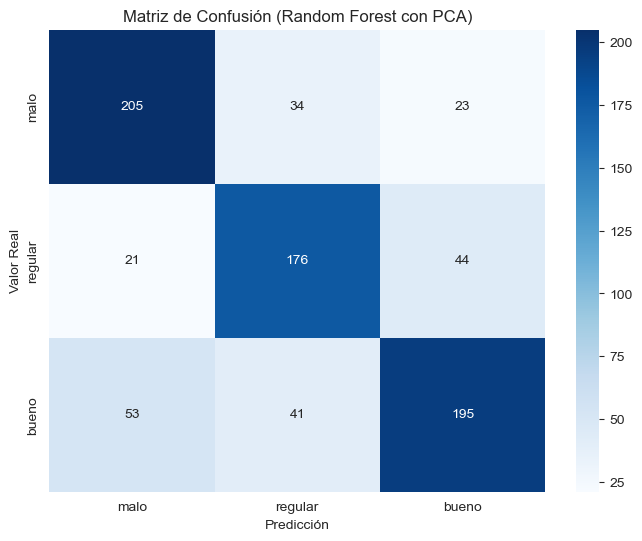

In [60]:
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['malo', 'regular', 'bueno'], 
            yticklabels=['malo', 'regular', 'bueno'])
plt.title('Matriz de Confusión (Random Forest con PCA)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Conclusiones del PCA

-
-
-
